In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import time

from sklearn.model_selection import train_test_split

print('Import Done!')

Import Done!


## Load Data

In [2]:
with tqdm() as bar:
    # do not skip any of the rows, but update the progress bar instead
    df = pd.read_csv('data/train.csv', skiprows=lambda x: bar.update(1) and False)

df.head()

26207it [00:00, 104339.23it/s]


,created_at,default_profile,default_profile_image,description,favourites_count,followers_count,friends_count,geo_enabled,id,lang,location,profile_background_image_url,profile_image_url,screen_name,statuses_count,verified,average_tweets_per_day,account_age_days,target
0,2012-01-15 23:40:09,True,False,Cosplayer/Fitness lover. Come to me https://t....,74,7,0,False,465096524,en,unknown,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/9666745212...,reml5477,20,False,0.006,3138,1
1,2016-10-04 00:44:39,False,False,pobody’s nerfect,50443,164,590,True,783105517673648132,cy,she/her,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1281752126...,kinlibra,6469,False,4.572,1415,0
2,2009-05-23 04:04:13,False,False,gracias por participar 🏅,9394,208,189,False,41970759,es,La diaspora,http://abs.twimg.com/images/themes/theme17/bg.gif,http://pbs.twimg.com/profile_images/1233811596...,_delaualau,30296,False,7.378,4106,0
3,2009-05-17 04:31:31,False,False,Stand Up Comedian/Actor from North Philadelphi...,46,66180,1090,True,40607946,en,"Calabasas, CA",http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1184851104...,SpankHorton,164957,False,40.116,4112,0
4,2009-02-16 13:11:21,True,False,Assignment Editor at NBC10 and President of Ja...,1223,487,867,True,20983433,en,"Jenkintown, PA",http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/5234863934...,javelinjt,1752,False,0.417,4201,0


## Train/Val/Test Split

The proportion of Train/Val/Test Split is:
<ul>
    <li>
        Train: 70%
    </li>
    <li>
        Val: 20%
    </li>
    <li>
        Test: 10%
    </li>
</ul>

In [3]:
X = df.drop('target', axis = 1) 
y = df['target']

In [4]:
# Initial split: 80% training, 20% validation & test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

# Second split: 10% validation, 10% test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=1, stratify=y_temp)

## Exploratory Data Analysis

In [5]:
df_train = X_train.copy()
df_train['target'] = y_train

df_train.head()

,created_at,default_profile,default_profile_image,description,favourites_count,followers_count,friends_count,geo_enabled,id,lang,location,profile_background_image_url,profile_image_url,screen_name,statuses_count,verified,average_tweets_per_day,account_age_days,target
12800,2016-03-24 15:55:14,True,False,You'll turn out ordinary if you're not careful...,33315,317,360,True,713031428833828865,en,"Nebraska, USA",NaN,http://pbs.twimg.com/profile_images/8681274423...,midwesternlivin,3126,False,1.944,1608,0
24611,2013-04-19 21:47:49,False,False,NaN,4537,82,835,False,1365481327,NaN,España,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1066967277...,juanhmetal,3487,False,1.302,2678,0
25400,2009-03-10 20:45:17,False,False,Tenista/ Tennis player https://t.co/GFbv9Txek4...,273,1820590,125,True,23653153,en,"Florianópolis, Brasil",http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1136630171...,gugakuerten,4443,True,1.063,4179,0
20148,2012-05-08 09:36:00,True,False,☼☾xvi // photography // ☽☼,76,27,0,False,574422621,en,unknown,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/5269345911...,tiffanylloyd018,204,False,0.067,3025,0
24284,2011-04-25 20:03:49,False,False,NaN,2906,135,0,False,287850643,NaN,unknown,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/8045759682...,alexsimons2,13754,False,4.042,3403,1


In [6]:
# ====== DF Info ======
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20964 entries, 12800 to 10106
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   created_at                    20964 non-null  object 
 1   default_profile               20964 non-null  bool   
 2   default_profile_image         20964 non-null  bool   
 3   description                   16904 non-null  object 
 4   favourites_count              20964 non-null  int64  
 5   followers_count               20964 non-null  int64  
 6   friends_count                 20964 non-null  int64  
 7   geo_enabled                   20964 non-null  bool   
 8   id                            20964 non-null  int64  
 9   lang                          16506 non-null  object 
 10  location                      20962 non-null  object 
 11  profile_background_image_url  18371 non-null  object 
 12  profile_image_url             20963 non-null  object 
 13  sc

<b>df_train consists of the following columns:</b>
<ol>
    <li>
        <b>created_at</b>, The date and time when the Twitter account was created --> datetime object
    </li>
    <li>
        <b>default_profile</b>, Indicates whether the user has a default profile settings --> boolean T/F
    </li>
    <li>
        <b>default_profile_image</b>, Indicates whether the user has a default profile image --> boolean T/F
    </li>
    <li>
        <b>description</b>, The user's profile description or bio --> string object
    </li>
    <li>
        <b>favourites_count</b>, The number of tweets the user has liked --> integer
    </li>
    <li>
        <b>followers_count</b>, The number of followers the user has --> integer
    </li>
    <li>
        <b>friends_count</b>, The number of accounts the user is following --> integer
    </li>
    <li>
        <b>geo_enabled</b>, Indicates whether the user has enabled location services --> boolean T/F
    </li>
    <li>
        <b>id</b>, The unique identifier for the Twitter account --> integer
    </li>
    <li>
        <b>lang</b>, The language preference set for the account --> string / category object
    </li>
    <li>
        <b>location</b>, The location information provided by the user --> string object
    </li>
    <li>
        <b>profile_background_image_url</b>, URL of the user's profile background image --> string object
    </li>
    <li>
        <b>profile_image_url</b>, URL of the user's profile image --> string object
    </li>
    <li>
        <b>screen_name</b>, The user's Twitter handle or username --> string object
    </li>
    <li>
        <b>statuses_count</b>, The total number of tweets posted by the user --> integer
    </li>
    <li>
        <b>verified</b>, Indicates whether the account is verified by Twitter --> boolean T/F
    </li>
    <li>
        <b>average_tweets_per_day</b>, The average number of tweets posted per day --> decimal float
    </li>
    <li>
        <b>account_age_days</b>, The age of the account in days --> integer
    </li>
    <li>
        <b>target</b>, The classification label indicating whether the account is a bot or not --> boolean 0/1 
    </li>
</ol>

In [7]:
# ====== checking null values ========
df_train.isnull().sum()
# found some empty values in: description, lang, profile_background_image_url, profile_image_url, location

created_at                         0
default_profile                    0
default_profile_image              0
description                     4060
favourites_count                   0
followers_count                    0
friends_count                      0
geo_enabled                        0
id                                 0
lang                            4458
location                           2
profile_background_image_url    2593
profile_image_url                  1
screen_name                        0
statuses_count                     0
verified                           0
average_tweets_per_day             0
account_age_days                   0
target                             0
dtype: int64

### 1) created_at

In [8]:
df_train['created_at'] = pd.to_datetime(df_train['created_at']) # convert to date time

In [9]:
df_train['created_at'].describe() # this dataset consist of user data created between 2006 and 2019

count                            20964
mean     2012-05-14 07:34:03.905266176
min                2006-07-13 09:05:49
25%      2009-12-18 20:29:25.750000128
50%                2011-10-27 22:40:25
75%                2014-04-29 20:37:29
max                2019-04-24 08:53:21
Name: created_at, dtype: object

In [10]:
df_train[df_train['target'] == 1][['created_at', 'target']].head(20)

,created_at,target
24284,2011-04-25 20:03:49,1
2770,2011-02-16 00:33:15,1
3711,2010-06-07 02:22:50,1
2085,2014-11-18 01:03:07,1
10098,2009-07-09 03:26:39,1
21780,2016-03-31 07:43:38,1
8381,2011-01-29 18:03:10,1
364,2013-10-16 03:49:08,1
9110,2010-08-31 13:49:33,1
18786,2017-06-21 10:52:37,1


In [11]:
df_train[df_train['target'] == 0][['created_at', 'target']].head(20)

,created_at,target
12800,2016-03-24 15:55:14,0
24611,2013-04-19 21:47:49,0
25400,2009-03-10 20:45:17,0
20148,2012-05-08 09:36:00,0
22592,2008-05-16 00:19:29,0
2101,2009-04-01 22:20:30,0
1029,2016-05-19 23:36:50,0
6117,2017-02-03 23:09:48,0
2913,2012-05-09 20:19:43,0
15398,2009-08-18 18:18:54,0


No futher transformation will be done for column `created_at` individually, there is no pattern between bot and non-bot in this column

### 2) default_profile

In [12]:
df_train['default_profile'] = df_train['default_profile'].astype(bool) # convert to boolean, if not done

In [13]:
df_train['default_profile'].value_counts()

default_profile
False    12145
True      8819
Name: count, dtype: int64

In [14]:
n_rows = df_train.shape[0]
n_bots = df_train['target'].sum()

print("Total rows:", n_rows)
print()
print("Number of bots captured on default profile settings:", df_train[df_train['default_profile'] == True]['target'].sum())
print("Number of bots captured on non-default profile settings:", df_train[df_train['default_profile'] == False]['target'].sum())
print()
print("Number of real user captured on default profile settings:", n_rows - df_train[df_train['default_profile'] == True]['target'].sum())
print("Number of real user captured on non-default profile settings:", n_rows - df_train[df_train['default_profile'] == False]['target'].sum())
print()
print('%.3f%% of the bots captured on default profile settings' % (df_train[df_train['default_profile'] == True]['target'].sum()/n_bots*100))

Total rows: 20964

Number of bots captured on default profile settings: 4388
Number of bots captured on non-default profile settings: 2638

Number of real user captured on default profile settings: 16576
Number of real user captured on non-default profile settings: 18326

62.454% of the bots captured on default profile settings


### 3) default_profile_image

In [15]:
df_train['default_profile_image'] = df_train['default_profile_image'].astype(bool) # convert to boolean, if not done

In [16]:
df_train['default_profile_image'].value_counts() 

default_profile_image
False    20661
True       303
Name: count, dtype: int64

In [17]:
n_rows = df_train.shape[0]
n_bots = df_train['target'].sum()

print("Total rows:", n_rows)
print()
print("Number of bots captured on default profile image:", df_train[df_train['default_profile_image'] == True]['target'].sum())
print("Number of bots captured on non-default profile image:", df_train[df_train['default_profile_image'] == False]['target'].sum())
print()
print("Number of real user captured on default profile image:", n_rows - df_train[df_train['default_profile_image'] == True]['target'].sum())
print("Number of real user captured on non-default profile image:", n_rows - df_train[df_train['default_profile_image'] == False]['target'].sum())
print()
print('%.3f%% of the bots captured on default profile image' % (df_train[df_train['default_profile_image'] == True]['target'].sum()/n_bots*100))

Total rows: 20964

Number of bots captured on default profile image: 212
Number of bots captured on non-default profile image: 6814

Number of real user captured on default profile image: 20752
Number of real user captured on non-default profile image: 14150

3.017% of the bots captured on default profile image


### 4) description

### 5) favourites_count

In [18]:
df_train['favourites_count'] = df_train['favourites_count'].astype(int) # convert to boolean, if not done

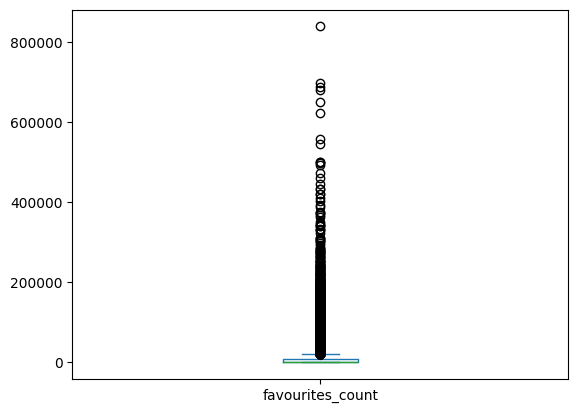

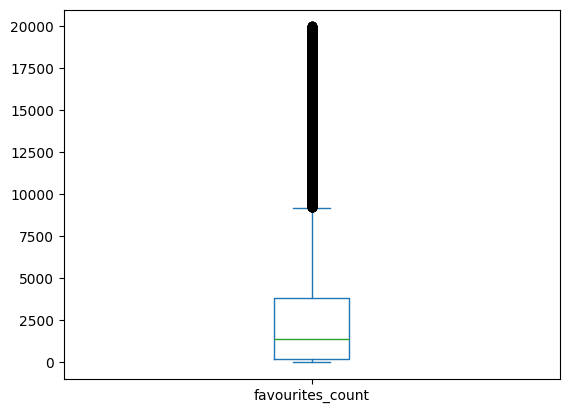

In [19]:
df_train['favourites_count'].plot(kind='box')
plt.show()

df_train[df_train['favourites_count'] < 20000]['favourites_count'].plot(kind='box')
plt.show() # the data is right skewed

In [20]:
df_train[df_train['target'] == 1]['favourites_count'].describe() # bots relatively has lower favourites count

count      7026.000000
mean       4349.146456
std       23776.743466
min           0.000000
25%         130.000000
50%        1109.500000
75%        2226.750000
max      839929.000000
Name: favourites_count, dtype: float64

In [21]:
df_train[df_train['target'] == 0]['favourites_count'].describe()

count     13938.000000
mean      16007.601234
std       36827.903409
min           0.000000
25%         651.250000
50%        3569.500000
75%       15024.500000
max      697525.000000
Name: favourites_count, dtype: float64

<Axes: ylabel='favourites_count'>

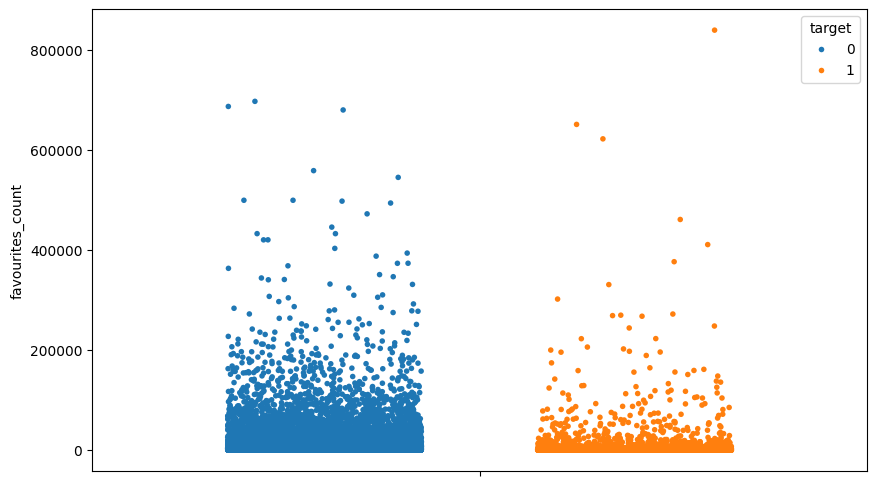

In [22]:
plt.figure(figsize=(10, 6))
sns.stripplot(
    data=df_train,
    y='favourites_count',
    hue='target',
    dodge=True,
    jitter=0.25,
    size=4
)

Bots relatively has lower `favourites_count` than real user, but not really a good feature if solely rely on this column. Feature cross is probably needed. <br/> Furthermore, the values of `favourites_count` is right skewed and need to be transformed (e.g. with log transformed).

### 6) followers_count

### 7) friends_count

### 8) geo_enabled

### 9) id

### 10) lang

### 11) location

### 12) profile_background_image_url

### 13) profile_image_url

### 14) screen_name

### 15) statuses_count

### 16) verified

### 17) average_tweets_per_day

### 18) account_age_days